In [1]:
library(data.table)
library(cowplot)
library(Matrix)
library(BuenColors)
library(RColorBrewer)

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: MASS


#### define functions

In [2]:
plot_umap <- function(df_umap,labels,title='UMAP',colormap=colormap){
    set.seed(2019) 
    df_umap = data.frame(cbind(df_umap,labels),stringsAsFactors = FALSE)
    colnames(df_umap) = c('umap1','umap2','celltype')
    df_umap$umap1 = as.numeric(df_umap$umap1)
    df_umap$umap2 = as.numeric(df_umap$umap2)
    options(repr.plot.width=4, repr.plot.height=4)
    p <- ggplot(shuf(df_umap), aes(x = umap1, y = umap2, color = celltype)) +
      geom_point(size = 1) + scale_color_manual(values = colormap) +
      ggtitle(title)
    return(p)
}

### Input

In [3]:
workdir = './bonemarrow_clean_results/'
path_fig = paste0(workdir,'figures/')
system(paste0('mkdir -p ',path_fig))

In [4]:
fig_basename = "simulated_bonemarrow_clean_"

In [5]:
path_umap = paste0(workdir,'umap_rds/')
path_clusters = paste0(workdir,'clusters/')

In [6]:
se = readRDS(paste0(workdir,'se.rds'))

In [7]:
se

class: RangedSummarizedExperiment 
dim: 120474 1200 
metadata(0):
assays(1): counts
rownames(120474): chr1_13307_13807 chr1_29040_29540 ...
  chrX_154841997_154842497 chrX_154862080_154862580
rowData names(0):
colnames(1200): CD4_1 CD4_2 ... NK_1199 NK_1200
colData names(1): celltype

In [8]:
# labels = se@colData$celltype
# colormap = jdb_color_maps

In [9]:
for (df in sapply(strsplit(list.files(path_umap), "\\."),'[',1)){
  assign(df,readRDS(paste0(path_umap,df,'.rds')))
}

In [10]:
ls()

[1] "df"                      "df_umap_BROCKMAN"       
 [3] "df_umap_chromVAR_kmer"   "df_umap_chromVAR_kmer2" 
 [5] "df_umap_chromVAR_motif"  "df_umap_chromVAR_motif2"
 [7] "df_umap_Cicero"          "df_umap_Cicero2"        
 [9] "df_umap_cisTopic"        "df_umap_control"        
[11] "df_umap_GeneScoring"     "df_umap_GeneScoring2"   
[13] "df_umap_LSI"             "df_umap_scABC"          
[15] "df_umap_scABC2"          "df_umap_Scasat"         
[17] "df_umap_SCRAT"           "df_umap_SCRAT2"         
[19] "df_umap_SnapATAC"        "fig_basename"           
[21] "path_clusters"           "path_fig"               
[23] "path_umap"               "plot_umap"              
[25] "se"                      "workdir"

In [11]:
for (method in sapply(strsplit(list.files(path_clusters), "\\."),'[',1)){
  assign(method,read.table(paste0(path_clusters,method,'.tsv'),
                                             sep='\t',header = TRUE,row.names = 1,
                                             colClasses = c('character','character','character')))
}

In [12]:
ls()

[1] "BROCKMAN_clusters"            "chromVAR_kmers_clusters"     
 [3] "chromVAR_kmers_pca_clusters"  "chromVAR_motifs_clusters"    
 [5] "chromVAR_motifs_pca_clusters" "Cicero_clusters"             
 [7] "Cicero_pca_clusters"          "cisTopic_clusters"           
 [9] "Control_clusters"             "df"                          
[11] "df_umap_BROCKMAN"             "df_umap_chromVAR_kmer"       
[13] "df_umap_chromVAR_kmer2"       "df_umap_chromVAR_motif"      
[15] "df_umap_chromVAR_motif2"      "df_umap_Cicero"              
[17] "df_umap_Cicero2"              "df_umap_cisTopic"            
[19] "df_umap_control"              "df_umap_GeneScoring"         
[21] "df_umap_GeneScoring2"         "df_umap_LSI"                 
[23] "df_umap_scABC"                "df_umap_scABC2"              
[25] "df_umap_Scasat"               "df_umap_SCRAT"               
[27] "df_umap_SCRAT2"               "df_umap_SnapATAC"            
[29] "fig_basename"                 "GeneScoring_clusters"        
[31] "GeneScoring_pca_clusters"     "LSI_clusters"                
[33] "method"                       "path_clusters"               
[35] "path_fig"                     "path_umap"                   
[37] "plot_umap"                    "scABC_clusters"              
[39] "scABC_pca_clusters"           "Scasat_clusters"             
[41] "SCRAT_clusters"               "SCRAT_pca_clusters"          
[43] "se"                           "SnapATAC_clusters"           
[45] "workdir"

In [13]:
num_colors = 12
colormap = colorRampPalette(brewer.pal(8, "Set2"))(num_colors)
names(colormap) = as.character(seq(0,num_colors-1))

In [14]:
for(cl in c('louvain','kmeans','hc')){
    p_control <- plot_umap(df_umap_control,labels = Control_clusters[cl],colormap = colormap,title='Control Group')
    p_chromVAR_motif <- plot_umap(df_umap_chromVAR_motif,labels = chromVAR_motifs_clusters[cl],colormap = colormap,title='chromVAR motif')
    p_chromVAR_kmer <- plot_umap(df_umap_chromVAR_kmer,labels = chromVAR_kmers_clusters[cl],colormap = colormap,title='chromVAR kmer')
    p_chromVAR_motif2 <- plot_umap(df_umap_chromVAR_motif2,labels = chromVAR_motifs_pca_clusters[cl],colormap = colormap,title='chromVAR motif after PCA')
    p_chromVAR_kmer2 <- plot_umap(df_umap_chromVAR_kmer2,labels = chromVAR_kmers_pca_clusters[cl],colormap = colormap,title='chromVAR kmer after PCA')
    p_LSI <- plot_umap(df_umap_LSI,labels = LSI_clusters[cl],colormap = colormap,title='LSI')
    p_cisTopic <- plot_umap(df_umap_cisTopic,labels = cisTopic_clusters[cl],colormap = colormap,title='cisTopic')
    p_GeneScoring <- plot_umap(df_umap_GeneScoring,labels = GeneScoring_clusters[cl],colormap = colormap,title='Gene Scoring')
    p_GeneScoring2 <- plot_umap(df_umap_GeneScoring2,labels = GeneScoring_pca_clusters[cl],colormap = colormap,title='Gene Scoring after PCA')
    p_Cicero <- plot_umap(df_umap_Cicero,labels = Cicero_clusters[cl],colormap = colormap,title='Cicero')
    p_Cicero2 <- plot_umap(df_umap_Cicero2,labels = Cicero_pca_clusters[cl],colormap = colormap,title='Cicero after PCA')
    p_SnapATAC <- plot_umap(df_umap_SnapATAC,labels = SnapATAC_clusters[cl],colormap = colormap,title='SnapATAC')
    p_scABC <- plot_umap(df_umap_scABC,labels = scABC_clusters[cl],colormap = colormap,title='scABC')
    p_scABC2 <- plot_umap(df_umap_scABC2,labels = scABC_pca_clusters[cl],colormap = colormap,title='scABC after PCA')
    p_SCRAT <- plot_umap(df_umap_SCRAT,labels = SCRAT_clusters[cl],colormap = colormap,title='SCRAT')
    p_SCRAT2 <- plot_umap(df_umap_SCRAT2,labels = SCRAT_pca_clusters[cl],colormap = colormap,title='SCRAT after PCA')
    p_Scasat <- plot_umap(df_umap_Scasat,labels = Scasat_clusters[cl],colormap = colormap,title='Scasat')
    p_BROCKMAN <- plot_umap(df_umap_BROCKMAN,labels = BROCKMAN_clusters[cl],colormap = colormap,title='BROCKMAN')
    options(repr.plot.width=4*6, repr.plot.height=4*3)
    p_group <- cowplot::plot_grid(p_control+theme(legend.position = "none"),
                   p_BROCKMAN+theme(legend.position = "none"),
                   p_cisTopic+theme(legend.position = "none"),
                   p_LSI+theme(legend.position = "none"),
                   p_Scasat+theme(legend.position = "none"),  
                   p_SnapATAC+theme(legend.position = "none"),         
                   p_Cicero+theme(legend.position = "none"),p_Cicero2+theme(legend.position = "none"),
                   p_chromVAR_kmer+theme(legend.position = "none"),p_chromVAR_kmer2+theme(legend.position = "none"),
                   p_chromVAR_motif+theme(legend.position = "none"),p_chromVAR_motif2+theme(legend.position = "none"),
                   p_GeneScoring+theme(legend.position = "none"),p_GeneScoring2+theme(legend.position = "none"),
                   p_scABC+theme(legend.position = "none"),p_scABC2+theme(legend.position = "none"),
                   p_SCRAT+theme(legend.position = "none"),p_SCRAT2+theme(legend.position = "none"),
                   labels = "",ncol = 6)
    cowplot::ggsave(p_group,
                    filename = paste0(path_fig,fig_basename,cl,'.pdf'), 
                    width = 4*6, height = 4*3)
}

In [15]:
# for(cl in c('louvain')){
#     p_cisTopic <- plot_umap(df_umap_cisTopic,labels = cisTopic_clusters[cl],colormap = colormap,title='cisTopic')
#     p_SnapATAC <- plot_umap(df_umap_SnapATAC,labels = SnapATAC_clusters[cl],colormap = colormap,title='SnapATAC')
# }

Loading required package: magrittr

Attaching package: ‘ggpubr’

The following object is masked from ‘package:cowplot’:

    get_legend

Saving 6.67 x 6.67 in image


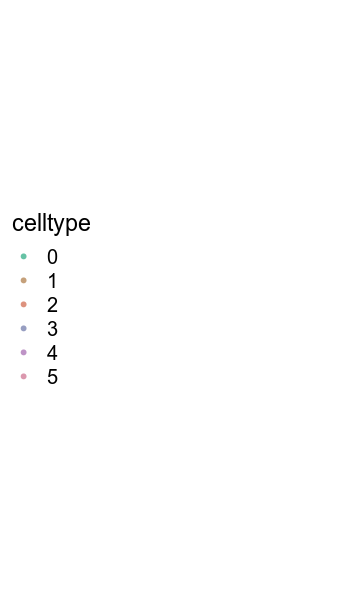

In [16]:
options(repr.plot.width=3, repr.plot.height=5)
library(ggpubr)
leg <- cowplot::get_legend(p_cisTopic)

p_legend = as_ggplot(leg)
p_legend
cowplot::ggsave(file=paste0(path_fig,'bonemarrow_clean_legend_for_clusters.pdf'), p_legend)